### Customer Profiling

This activity is meant to give you practice exploring data including the use of visualizations with `matplotlib`, `seaborn`, and `plotly`.  The dataset contains demographic information on the customers, information on customer purchases, engagement of customers with promotions, and information on where customer purchases happened.  A complete data dictionary can be found below.  

Your task is to explore the data and use visualizations to inform answers to specific questions using the data.  The questions and resulting visualization should be posted in the group discussion related to this activity.  Some example problems/questions to explore could be:

-----

- Does income differentiate customers who purchase wine? 
- What customers are more likely to participate in the last promotional campaign?
- Are customers with children more likely to purchase products online?
- Do married people purchase more wine?
- What kinds of purchases led to customer complaints?

-----

### Data Dictionary

Attributes


```
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise


MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
```

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/jaikumar/Desktop/Berkeley_ML/try-it_4.1_starter/data/marketing_campaign.csv', sep = '\t')

In [46]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

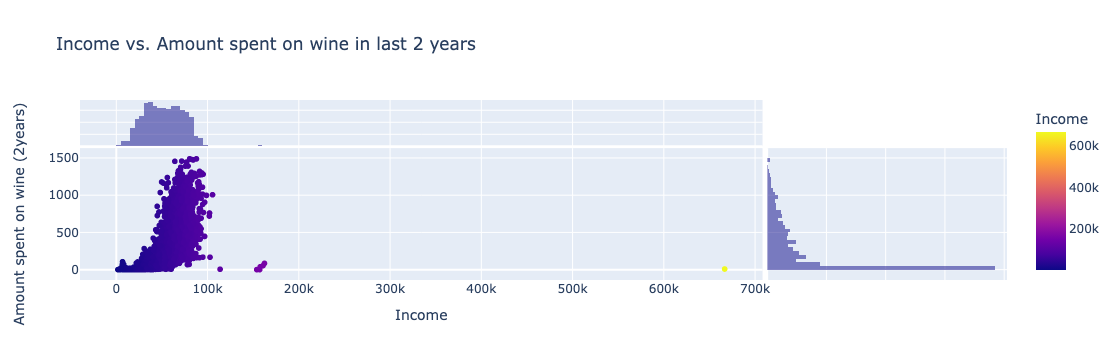

In [16]:
#Does income differentiate customers who purchase wine?

fig = px.scatter(df, x='Income', y='MntWines',
                 marginal_x='histogram', marginal_y='histogram',color = 'Income',title='Income vs. Amount spent on wine in last 2 years')
fig.update_layout(yaxis_title='Amount spent on wine (2years)')

fig.show()


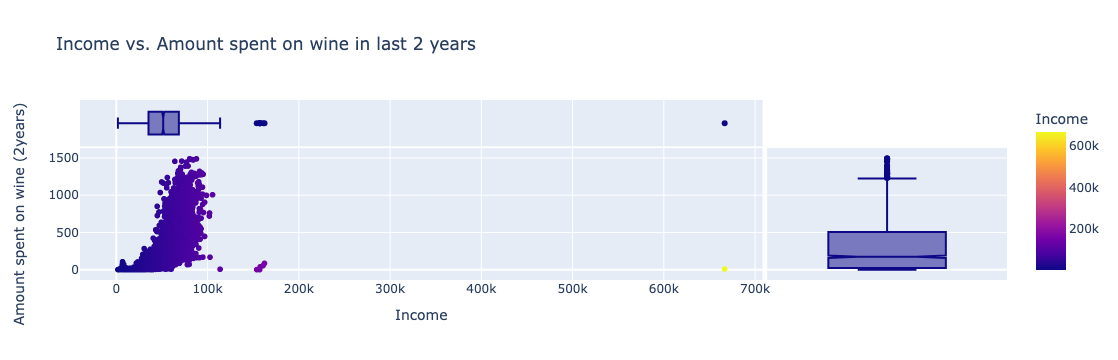

In [17]:
#Does income differentiate customers who purchase wine?
fig = px.scatter(df, x='Income', y='MntWines',
                 marginal_x='box', marginal_y='box', color='Income',
                 title='Income vs. Amount spent on wine in last 2 years')
fig.update_layout(yaxis_title='Amount spent on wine (2years)')

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



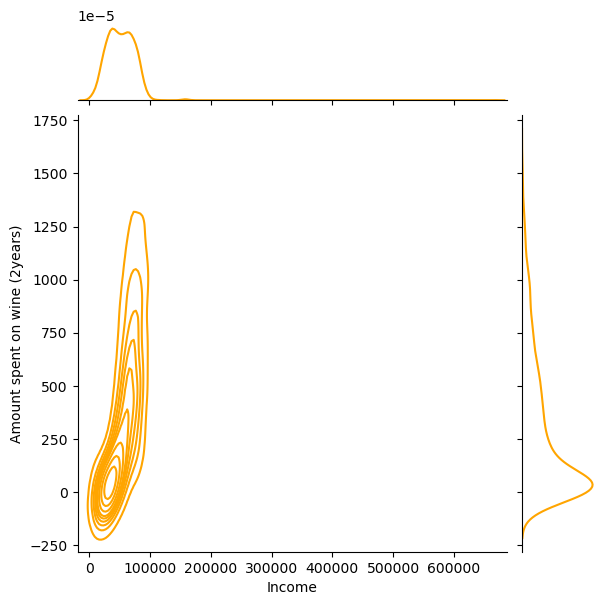

In [65]:
sns.jointplot(data=df, x='Income', y='MntWines', kind='kde', color='orange')
jointplot.fig.suptitle('Income vs. Amount spent on wine in last 2 years')
jointplot.fig.subplots_adjust(top=0.95)
plt.ylabel('Amount spent on wine (2years)')
plt.show()
plt.show()

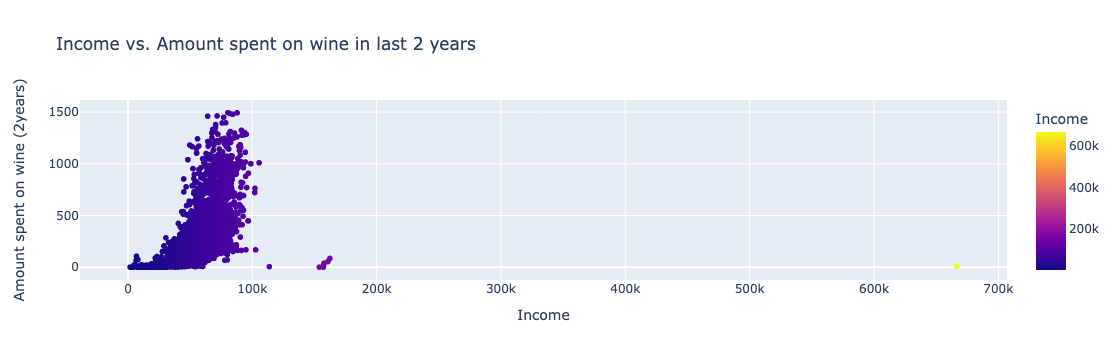

In [18]:
#Does income differentiate customers who purchase wine?
fig = px.scatter(df, x='Income', y='MntWines', color='Income',
                 title='Income vs. Amount spent on wine in last 2 years')
fig.update_layout(yaxis_title='Amount spent on wine (2years)')

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



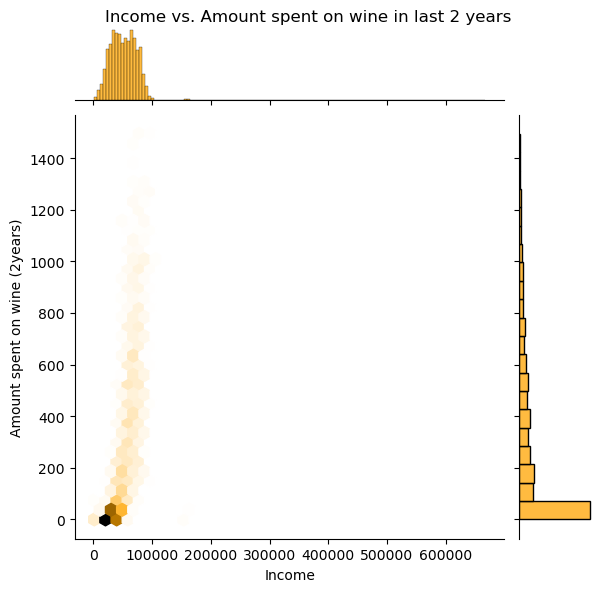

In [20]:
#Does income differentiate customers who purchase wine?
jointplot = sns.jointplot(data=df, x='Income', y='MntWines', kind='hex', color='orange')
jointplot.fig.suptitle('Income vs. Amount spent on wine in last 2 years')
jointplot.fig.subplots_adjust(top=0.95)
plt.ylabel('Amount spent on wine (2years)')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



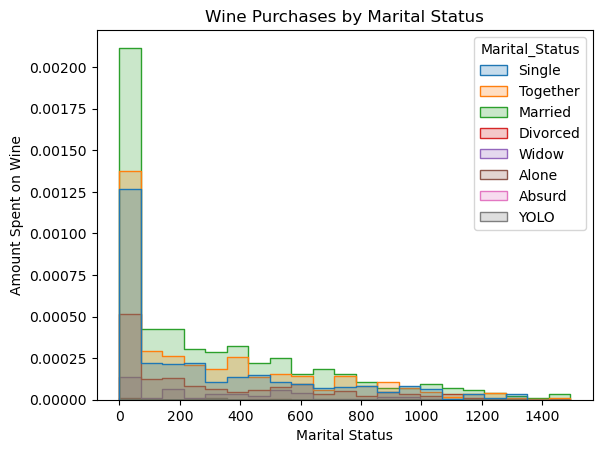

In [25]:
#Do married people purchase more wine?
sns.histplot(data=df, x='MntWines', hue='Marital_Status', element='step', stat='density')
plt.title('Wine Purchases by Marital Status')
plt.ylabel('Amount Spent on Wine')
plt.xlabel('Marital Status')
plt.show()

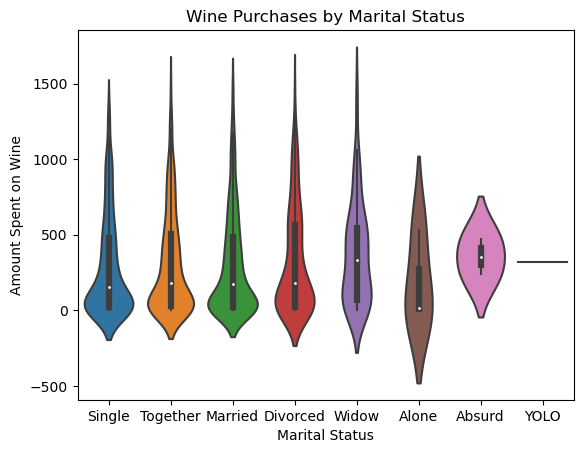

In [23]:
#Do married people purchase more wine?
sns.violinplot(x='Marital_Status', y='MntWines', data=df)
plt.title('Wine Purchases by Marital Status')
plt.ylabel('Amount Spent on Wine')
plt.xlabel('Marital Status')
plt.show()

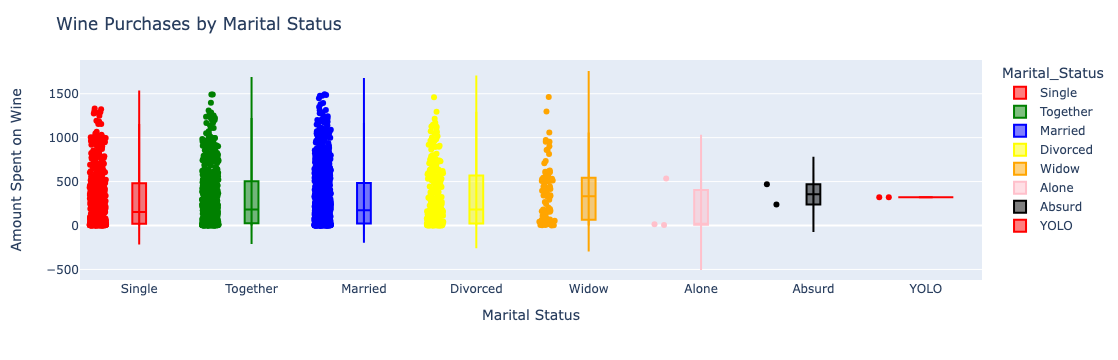

In [30]:
#Do married people purchase more wine?
fig = px.violin(df,x='Marital_Status', y='MntWines', box=True, points='all', color='Marital_Status',
                color_discrete_sequence=['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'light blue'])

fig.update_layout(
    title='Wine Purchases by Marital Status',
    yaxis_title='Amount Spent on Wine',
    xaxis_title='Marital Status'
)

fig.show()

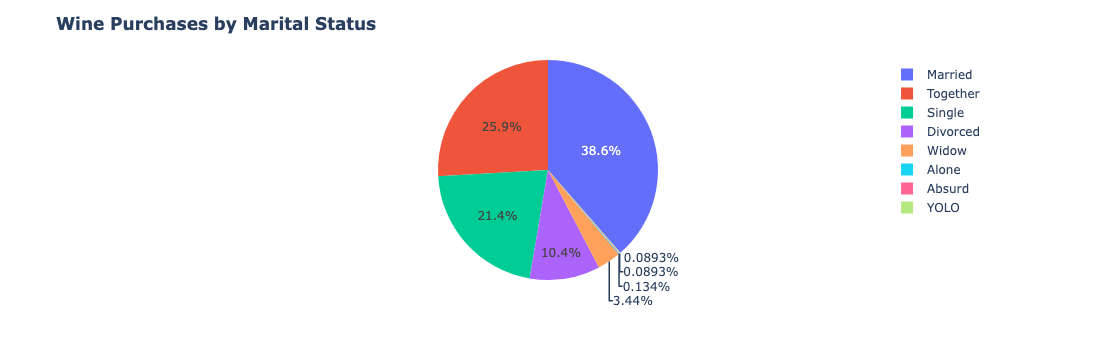

In [32]:
#Do married people purchase more wine?
fig = px.pie(df, names='Marital_Status')
fig.update_layout(title='<b>Wine Purchases by Marital Status<b>')
fig.show()

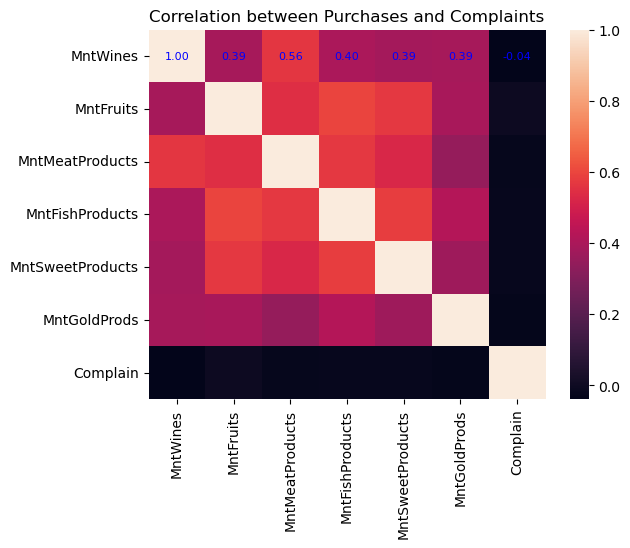

In [45]:
#What kinds of purchases led to customer complaints?
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
sns.heatmap(df[purchase_columns + ['Complain']].corr(), annot=True, fmt='.2f', annot_kws={'size': 8, 'color': 'blue'})
plt.title('Correlation between Purchases and Complaints')
plt.show()

In [40]:
#What kinds of purchases led to customer complaints?
df_comp = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Complain']]
#df_corr.info()
df_comp_corr = df_comp.corr()
print (df_comp_corr)

                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines          1.000000   0.389637         0.562667         0.399753   
MntFruits         0.389637   1.000000         0.543105         0.594804   
MntMeatProducts   0.562667   0.543105         1.000000         0.568402   
MntFishProducts   0.399753   0.594804         0.568402         1.000000   
MntSweetProducts  0.386581   0.567164         0.523846         0.579870   
MntGoldProds      0.387516   0.392995         0.350609         0.422875   
Complain         -0.039007  -0.005166        -0.023483        -0.020953   

                  MntSweetProducts  MntGoldProds  Complain  
MntWines                  0.386581      0.387516 -0.039007  
MntFruits                 0.567164      0.392995 -0.005166  
MntMeatProducts           0.523846      0.350609 -0.023483  
MntFishProducts           0.579870      0.422875 -0.020953  
MntSweetProducts          1.000000      0.369724 -0.022485  
MntGoldProds              0.36972

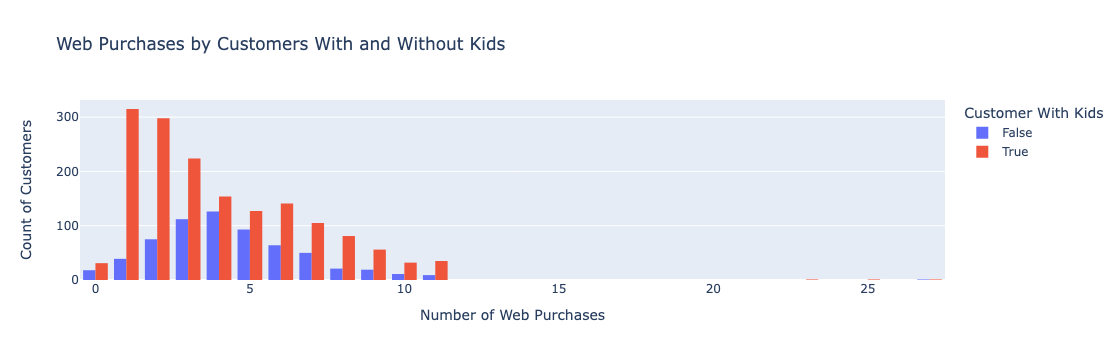

In [60]:
#Are customers with children more likely to purchase products online?
df['CustomerWithKids'] = (df['Kidhome'] + df['Teenhome']) > 0  # This will be True if the sum is greater than 0

# Plotting the graph
#plt.figure(figsize=(10, 6))
#sns.countplot(x='CustomerWithKids', hue='NumWebPurchases', data=df)
#plt.title('Number of Web Purchases for Customers With and Without Kids')
#plt.xlabel('Customer With Kids')
#plt.ylabel('Count of Web Purchases')
#plt.legend(title='NumWebPurchases', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()  # Adjust layout to fit the legend
#plt.show()

# Now, plot the graph using Plotly
fig = px.histogram(df, x='NumWebPurchases', color='CustomerWithKids',
                   barmode='group', title='Web Purchases by Customers With and Without Kids')

# Update the layout for clarity
fig.update_layout(xaxis_title='Number of Web Purchases',
                  yaxis_title='Count of Customers',
                  legend_title='Customer With Kids')

# Show the plot
fig.show()

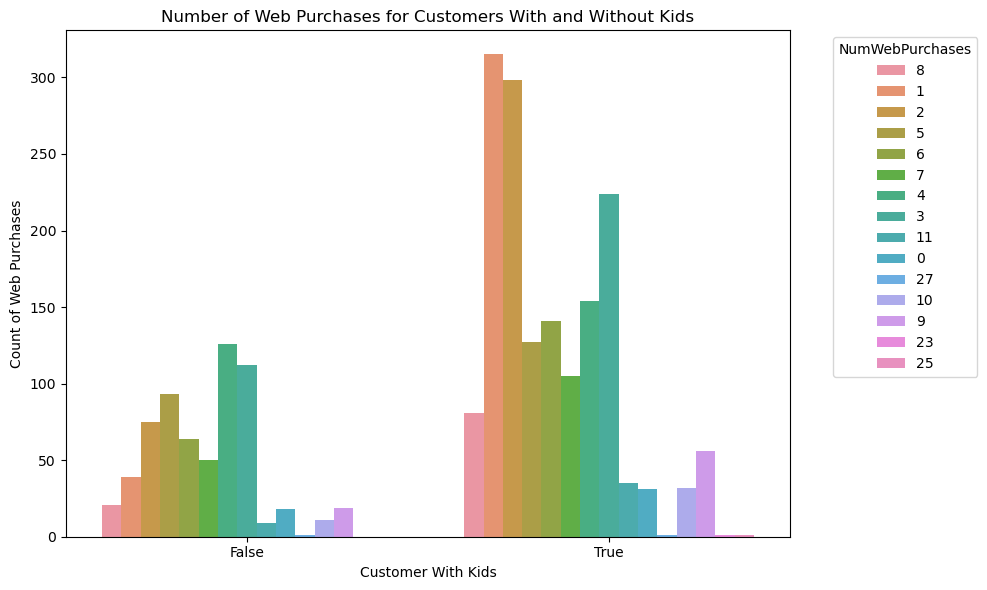

In [63]:
#Are customers with children more likely to purchase products online?
df['CustomerWithKids'] = (df['Kidhome'] + df['Teenhome']) > 0  # This will be True if the sum is greater than 0
df['CustomerWithKids'] = df['CustomerWithKids'].astype(str)
df['NumWebPurchases'] = df['NumWebPurchases'].astype(str)
# Plotting the graph
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerWithKids', hue='NumWebPurchases', data=df)
plt.title('Number of Web Purchases for Customers With and Without Kids')
plt.xlabel('Customer With Kids')
plt.ylabel('Count of Web Purchases')
plt.legend(title='NumWebPurchases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()


Post your questions with an accompanying visualization in canvas.  You should generate at least three different questions and resulting visualizations.  Include complete sentence explanations of your interpretations of the visualizations.